In [7]:
import os
import sys

import numpy as np

import pyda
from pyda.dsp.spectral import psd
from pyda.dsp.filter import FIR
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'xx-large',
          'ytick.labelsize': 'xx-large'}
pylab.rcParams.update(params)

sys.path.insert(0, os.path.abspath('../'))

from pyda.tsdata import TSData
from pyda.xydata import XYData
from pyda.dsp.spectral import psd, tfe
import matplotlib.pyplot as plt
import numpy

FigSize = (15,10) # global setting for figure size

In [8]:
A = 1
An = 0.5 # m/sqrt(Hz)
s = A * TSData.sinewave(nsecs=5000, fs=10, f0=1, name='ts1', yunits='m')
ts1 = s + An*TSData.randn(nsecs=5000, fs=10, name="TS1", yunits="m")

print(ts1)

lp = FIR.lowpass(fc=2, gain=1, fs=10, order=8, win='blackmanharris', iunits='V', ounits='m')

tso = lp.filter(ts1)


-------- TSData ---------
  name: ((1*ts1) + (0.5*TS1))
  uuid: 7087d369-8b5b-41fc-8fe1-8e2173092468
    fs: 10.0
 nsecs: 5000.000000000001
 xaxis: Time=(50000,)[s]
 yaxis: Amplitude=(50000,)[m]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[m]

-----------------------------


Processing PSD with segments of length 2381 and overlap of 1573.0 samples (66.1%)
Scaling to PSD
plotting complex data...


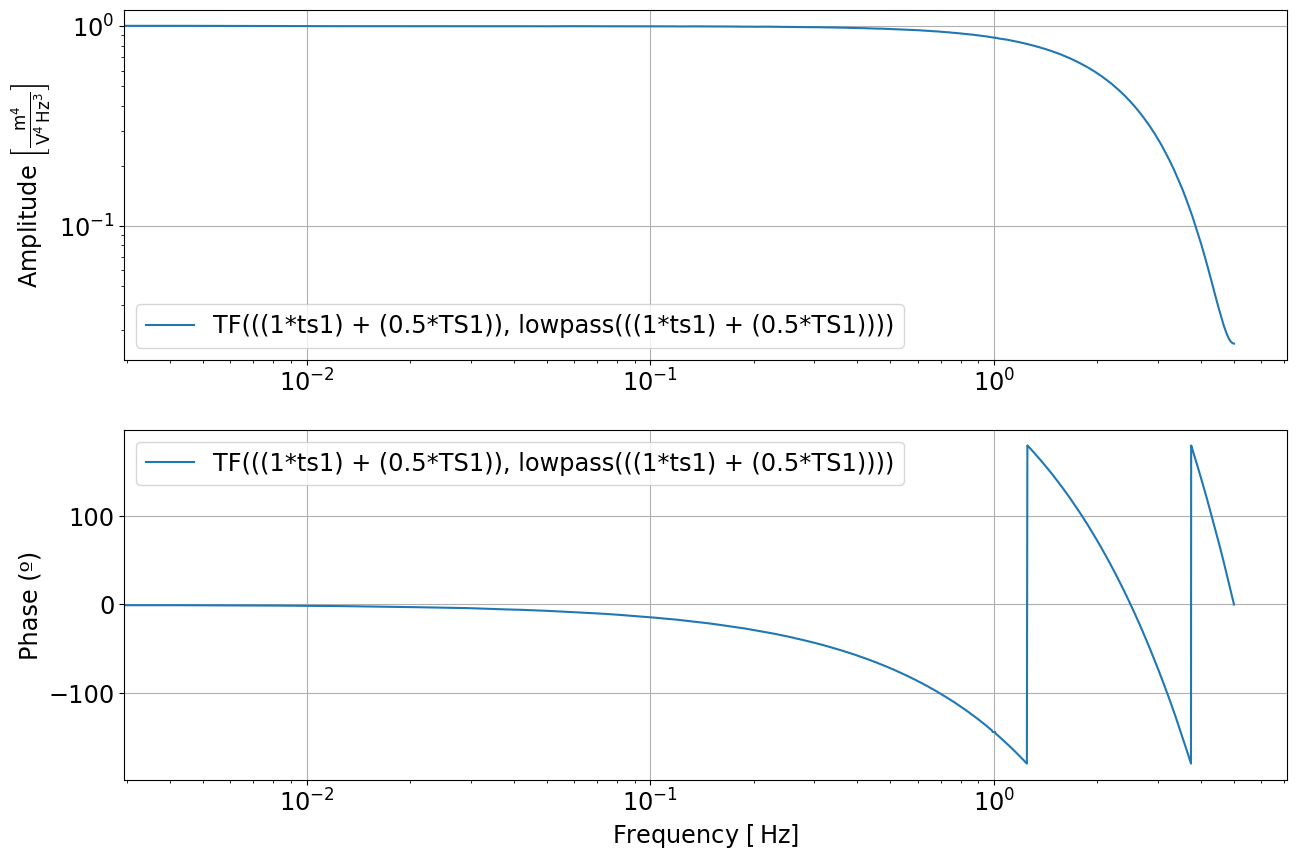

In [9]:
T = tfe(ts1, tso, navs=60, window='BH92')

h = T.loglog()
